<a href="https://colab.research.google.com/github/Victor-Mutuku/Linear-Regression-Model/blob/main/Victor_Mutuku_Linear_regression_CS_DA02_25021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving areas.csv to areas.csv
Saving homeprices.csv to homeprices.csv
Saving homeprices-m.csv to homeprices-m.csv


In [4]:
#Load the Data
areas_df = pd.read_csv('/content/areas.csv')
homeprices_df = pd.read_csv('/content/homeprices.csv')
homepricesm_df = pd.read_csv('/content/homeprices-m.csv')
#Display the head of each datafram
display(areas_df.head())
display(homeprices_df.head())
display(homepricesm_df.head())

,area
0,1000
1,1500
2,2300
3,3540
4,4120


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [5]:
#Inspect the Datasets Structure
#(a)Info
display(areas_df.info())
display(homeprices_df.info())
display(homepricesm_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    13 non-null     int64
dtypes: int64(1)
memory usage: 236.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


None

In [6]:
#(b)Checking missing values
areas_df.isnull().sum()

,0
area,0


In [7]:
homeprices_df.isnull().sum()

,0
area,0
price,0


In [8]:
homepricesm_df.isnull().sum()

,0
area,0
bedrooms,1
age,0
price,0


In [9]:
#Handling Missing Values
homepricesm_df['bedrooms'].fillna(homepricesm_df['bedrooms'].median(),inplace=True)
homepricesm_df.isnull().sum()

/tmp/ipython-input-3152925729.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  homepricesm_df['bedrooms'].fillna(homepricesm_df['bedrooms'].median(),inplace=True)


,0
area,0
bedrooms,0
age,0
price,0


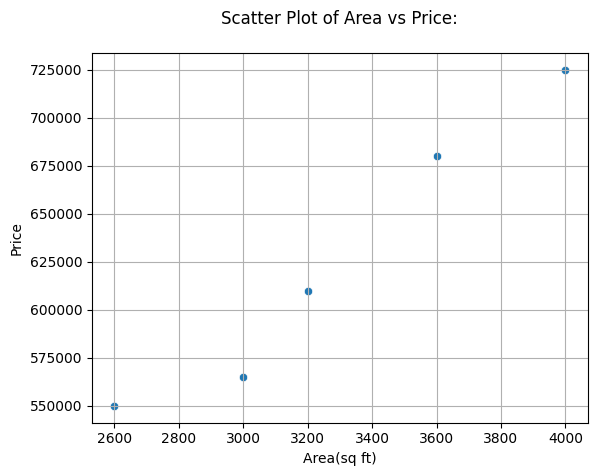

In [10]:
#Visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='area',y='price',data=homeprices_df)
plt.title('Scatter Plot of Area vs Price:\n')
plt.grid(True)
plt.xlabel('Area(sq ft)')
plt.ylabel('Price')
plt.show()

In [11]:
#Prepare the Data and Target
x=homeprices_df[['area']]
y=homeprices_df['price']

In [12]:
#Spliting into Training and Test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
#Building and Training the Model
from sklearn.linear_model import LinearRegression
model=LinearRegression() #build
model.fit(x_train,y_train) #train(fit)

LinearRegression()

In [14]:
#Predicting using Area Dataset
price_predicted=model.predict(areas_df[['area']]) # Predict using the entire areas_df
areas_df['predicted_price']=price_predicted
print(areas_df)

    area  predicted_price
0   1000     3.398131e+05
1   1500     4.039486e+05
2   2300     5.065654e+05
3   3540     6.656215e+05
4   4120     7.400187e+05
5   4560     7.964579e+05
6   5490     9.157500e+05
7   3460     6.553598e+05
8   4750     8.208294e+05
9   2300     5.065654e+05
10  9000     1.365981e+06
11  8600     1.314673e+06
12  7100     1.122266e+06
